In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import plotly.express as px
import plotly as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from scaling import standardize, normalize
import matplotlib.pyplot as plt
import pandas as pd
import collections, numpy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [51]:
df2015 = pd.read_csv('../data/kaasa/kaasa_2015.csv', index_col=None, header=0)
df2016 = pd.read_csv('../data/kaasa/kaasa_2016.csv', index_col=None, header=0)
df2017 = pd.read_csv('../data/kaasa/kaasa_2017.csv', index_col=None, header=0)
df2018 = pd.read_csv('../data/kaasa/kaasa_2018.csv', index_col=None, header=0)
df2019 = pd.read_csv('../data/kaasa/kaasa_2019.csv', index_col=None, header=0)
df2020 = pd.read_csv('../data/kaasa/kaasa_2020.csv', index_col=None, header=0)
df2021 = pd.read_csv('../data/kaasa/kaasa_2021.csv', index_col=None, header=0)

files = [df2016, df2017, df2018,df2020]

df = pd.concat(files, axis=0, ignore_index=True)

df['date_time'] = pd.to_datetime(df['date_time'])
for x in df.index:
    df.at[x, 'date_time'] = df.at[x, 'date_time'].timestamp()
df = standardize(df, ['velocity', 'altitude', 'latitude', 'longitude', 'temperature',  'date_time', 'sin_time', 'cos_time']) # standarize the data
df = normalize(df, ['velocity', 'altitude', 'latitude', 'longitude', 'temperature', 'date_time', 'sin_time', 'cos_time'], -1, 1) # normalize the data
sheep_data = df.loc[:,['velocity', 'altitude', 'attack', 'latitude', 'longitude', 'temperature', 'date_time']]

print(sheep_data.head(10))
#df.drop(columns=[columns[i]], inplace=True)

   velocity  altitude  attack  latitude  longitude  temperature  date_time
0 -1.000000 -0.820168       0  0.613871  -0.164709    -0.030120  -0.979886
1 -0.994063 -0.824618       0  0.612760  -0.163292     0.036145  -0.979873
2 -0.983628 -0.410745       1  0.396618  -0.238717    -0.162651  -0.979454
3 -0.997766 -0.451881       0  0.360262  -0.239518    -0.391566  -0.979021
4 -0.996787 -0.323110       1  0.411868  -0.244411     0.138554  -0.978588
5 -0.998470 -0.422365       1  0.389756  -0.238200    -0.246988  -0.978155
6 -0.999113 -0.459479       0  0.376670  -0.235044    -0.584337  -0.977723
7 -0.999480 -0.430112       1  0.383068  -0.237929    -0.042169  -0.977290
8 -0.998501 -0.415698       0  0.361778  -0.244539     0.060241  -0.976857
9 -0.999816 -0.423538       0  0.363861  -0.243202    -0.427711  -0.976425


In [52]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(sheep_data.drop(['attack'], axis=1),
                                                    sheep_data['attack'],
                                                    test_size=0.2,
                                                    random_state=42)

# Train a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)
counter = collections.Counter(y_pred)
print(counter)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(y_test.value_counts())
print("Accuracy of logistic regression: {:.2f}%".format(accuracy * 100))

Counter({0: 24021, 1: 74})
0    21959
1     2136
Name: attack, dtype: int64
Accuracy of logistic regression: 90.83%


Counter({0: 22889, 1: 1206})
0    21959
1     2136
Name: attack, dtype: int64
Accuracy of decision tree: 89.72%
Confusion matrix:
 [[21185   774]
 [ 1704   432]]


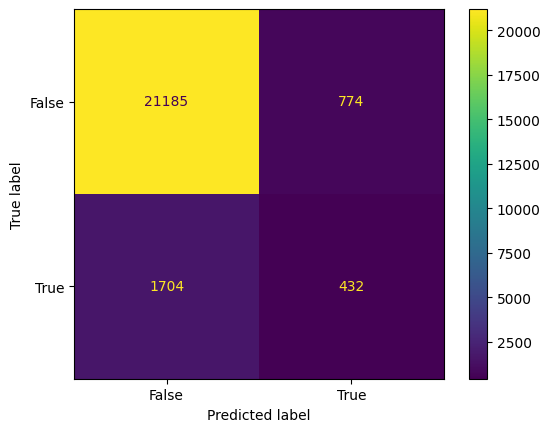

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     21959
           1       0.36      0.20      0.26      2136

    accuracy                           0.90     24095
   macro avg       0.64      0.58      0.60     24095
weighted avg       0.88      0.90      0.88     24095



In [54]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=10)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)
counter = collections.Counter(y_pred)
print(counter)
print(y_test.value_counts())

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of decision tree: {:.2f}%".format(accuracy * 100))


# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
# Compute classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Counter({0: 22241, 1: 1854})
0    21959
1     2136
Name: attack, dtype: int64
Accuracy of random forest: 98.32%
Confusion matrix:
 [[21898    61]
 [  343  1793]]


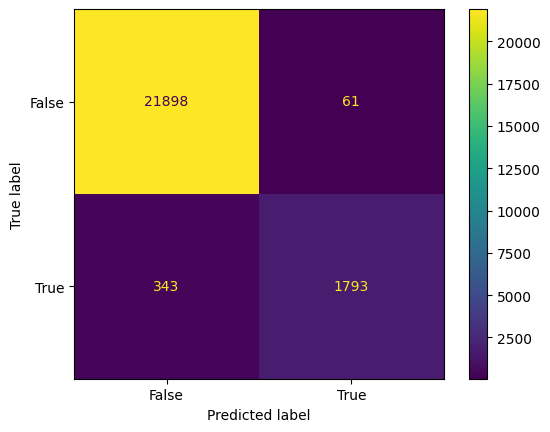

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21959
           1       0.97      0.84      0.90      2136

    accuracy                           0.98     24095
   macro avg       0.98      0.92      0.94     24095
weighted avg       0.98      0.98      0.98     24095



In [49]:

# Train a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
counter = collections.Counter(y_pred)   

print(counter)
print(y_test.value_counts())
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of random forest: {:.2f}%".format(accuracy * 100))


# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
# Compute classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Counter({0: 24095})
0    21959
1     2136
Name: attack, dtype: int64
Accuracy for SVM: 91.14%
Confusion matrix:
 [[21959     0]
 [ 2136     0]]


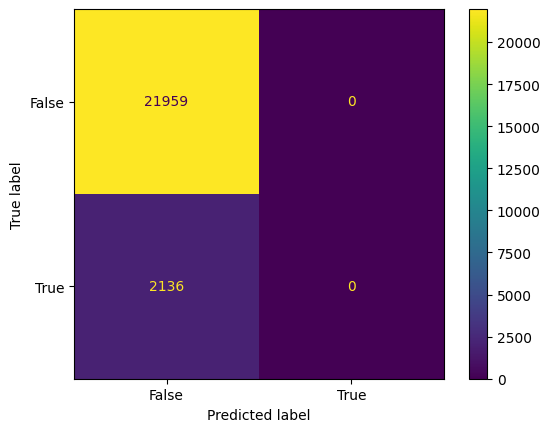

Classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     21959
           1       0.00      0.00      0.00      2136

    accuracy                           0.91     24095
   macro avg       0.46      0.50      0.48     24095
weighted avg       0.83      0.91      0.87     24095



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Counter({0: 22876, 1: 1219})
0    21959
1     2136
Name: attack, dtype: int64
Accuracy of random forest: 93.07%
Confusion matrix:
 [[21583   376]
 [ 1293   843]]


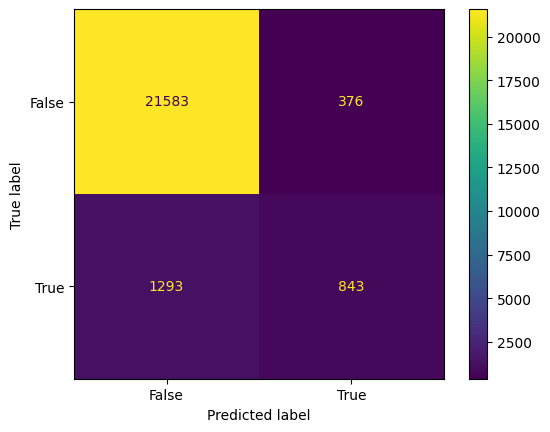

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     21959
           1       0.69      0.39      0.50      2136

    accuracy                           0.93     24095
   macro avg       0.82      0.69      0.73     24095
weighted avg       0.92      0.93      0.92     24095



In [38]:
# Train a neural network classifier
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nn_model.predict(X_test)
counter = collections.Counter(y_pred)   

print(counter)
print(y_test.value_counts())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of random forest: {:.2f}%".format(accuracy * 100))


# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
# Compute classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

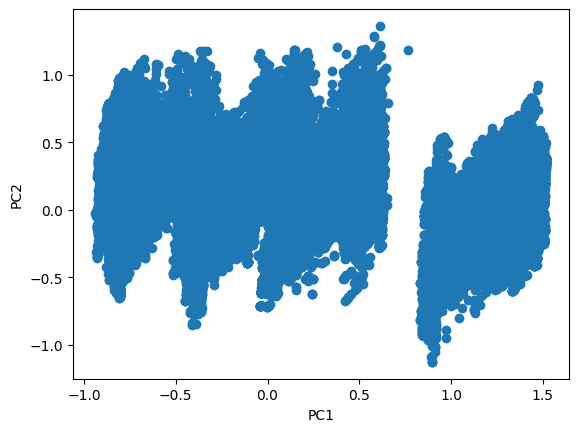